# Using multiple body circumferences to estimate body fat.

While the most accurate methords of estimating bodyfat require the use of DEXA (Dual Energy X-ray Absorptiometry) scans or hydrostatic weighing (underwater weighing). It is very expensive and thus impractical for low resources settings.
Alternative methords include the use of bio-impedance property of the human body but this methord may be highly inaccurate and the use of callipers to measure body fat in specific regions.
The dataset given below contains density calculated via hydrostatic weighing and body fat percentage calculated via siri's equation, which uses the density obtained earlier.

This notebook attempts to build a ML model using multiple linear , ridge , lasso regression and regression trees to predict body fat using multiple body circumferences without relying on the density calculated from underwater weighing.


While there are multiple methords to assess body fat




The variables used in this project are:

1.Density determined from underwater weighing

2.Percent body fat from Siri's (1956) equation( Percentage of Body Fat (i.e. 100*B) = 495/D - 450)

3.Age (years)

4.Weight (lbs)

5.Height (inches)

6.Neck circumference (cm)

7.Chest circumference (cm)

8.Abdomen 2 circumference (cm)

9.Hip circumference (cm)

10.Thigh circumference (cm)

11.Knee circumference (cm)

12.Ankle circumference (cm)

13.Biceps (extended) circumference (cm)

14.Forearm circumference (cm)

15.Wrist circumference (cm)


(Measurement standards are apparently those listed in Benhke and Wilmore (1974)



### 1. Data Description

The required packages are first imported. Then the dataset is read via .read_csv function and loaded into a pandas dataframe called data. The data types and distribution is assesed via the .dtypes and .describe command.

In [1]:
import pandas as pd, numpy as np , seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = 'D:\\DATA SCIENCE\\DS PROJECTS\\Proj 2\\bodyfat.csv'
data = pd.read_csv(filepath,sep =',')

In [3]:
data.dtypes
data.dtypes.value_counts()

float64    14
int64       1
dtype: int64

In [4]:
data.describe()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [5]:
data.drop(data[data.BodyFat < 2].index, inplace=True)
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055190,19.30120,44.944000,179.378800,70.176000,38.024800,100.950400,92.718800,100.007200,59.492400,38.626000,23.118400,32.321600,28.691200,18.242000
std,0.018607,8.23016,12.633101,29.059153,3.663086,2.412706,8.328483,10.667279,7.097397,5.179018,2.387569,1.690198,2.981741,2.004554,0.926992
min,0.995000,3.00000,22.000000,125.000000,29.500000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,1.041400,12.60000,36.000000,159.375000,68.312500,36.400000,94.675000,85.225000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054800,19.25000,43.500000,176.750000,70.125000,38.000000,99.700000,91.050000,99.300000,59.050000,38.500000,22.800000,32.100000,28.750000,18.300000
75%,1.070050,25.30000,54.000000,197.000000,72.250000,39.475000,105.525000,99.575000,103.575000,62.450000,39.975000,24.000000,34.375000,30.000000,18.800000
max,1.099100,47.50000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [6]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### 2. Data Cleaning

The total number of null values is first calculated. In this case there are no null values in the entire dataset, we can use the .info function to identify the columnwise distribution of NaN values.

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  250 non-null    float64
 1   BodyFat  250 non-null    float64
 2   Age      250 non-null    int64  
 3   Weight   250 non-null    float64
 4   Height   250 non-null    float64
 5   Neck     250 non-null    float64
 6   Chest    250 non-null    float64
 7   Abdomen  250 non-null    float64
 8   Hip      250 non-null    float64
 9   Thigh    250 non-null    float64
 10  Knee     250 non-null    float64
 11  Ankle    250 non-null    float64
 12  Biceps   250 non-null    float64
 13  Forearm  250 non-null    float64
 14  Wrist    250 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 31.2 KB


## 3.Data Exploration

Data exploration is usually done by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

In [9]:
y= data['BodyFat']
x = data.drop(['BodyFat'] , axis =1)
corr = x.corrwith(y)
corr.sort_values(inplace= True)
corr

Density   -0.987765
Height    -0.108772
Ankle      0.251285
Age        0.287268
Wrist      0.327173
Forearm    0.341796
Biceps     0.475113
Neck       0.475271
Knee       0.492186
Thigh      0.542775
Weight     0.598663
Hip        0.613384
Chest      0.693743
Abdomen    0.807440
dtype: float64

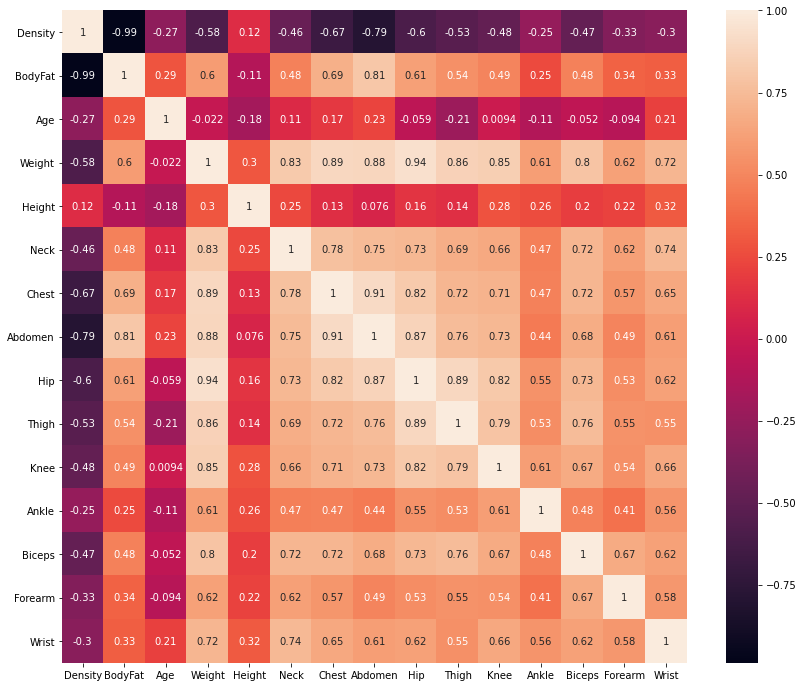

In [10]:
fig, ax = plt.subplots(figsize=(14,12))  
dataplot = sns.heatmap(data.corr(), annot=True, ax= ax)

As part of the data exploration a pair plot is generated which helps visualize the correlation between any 2 variables.

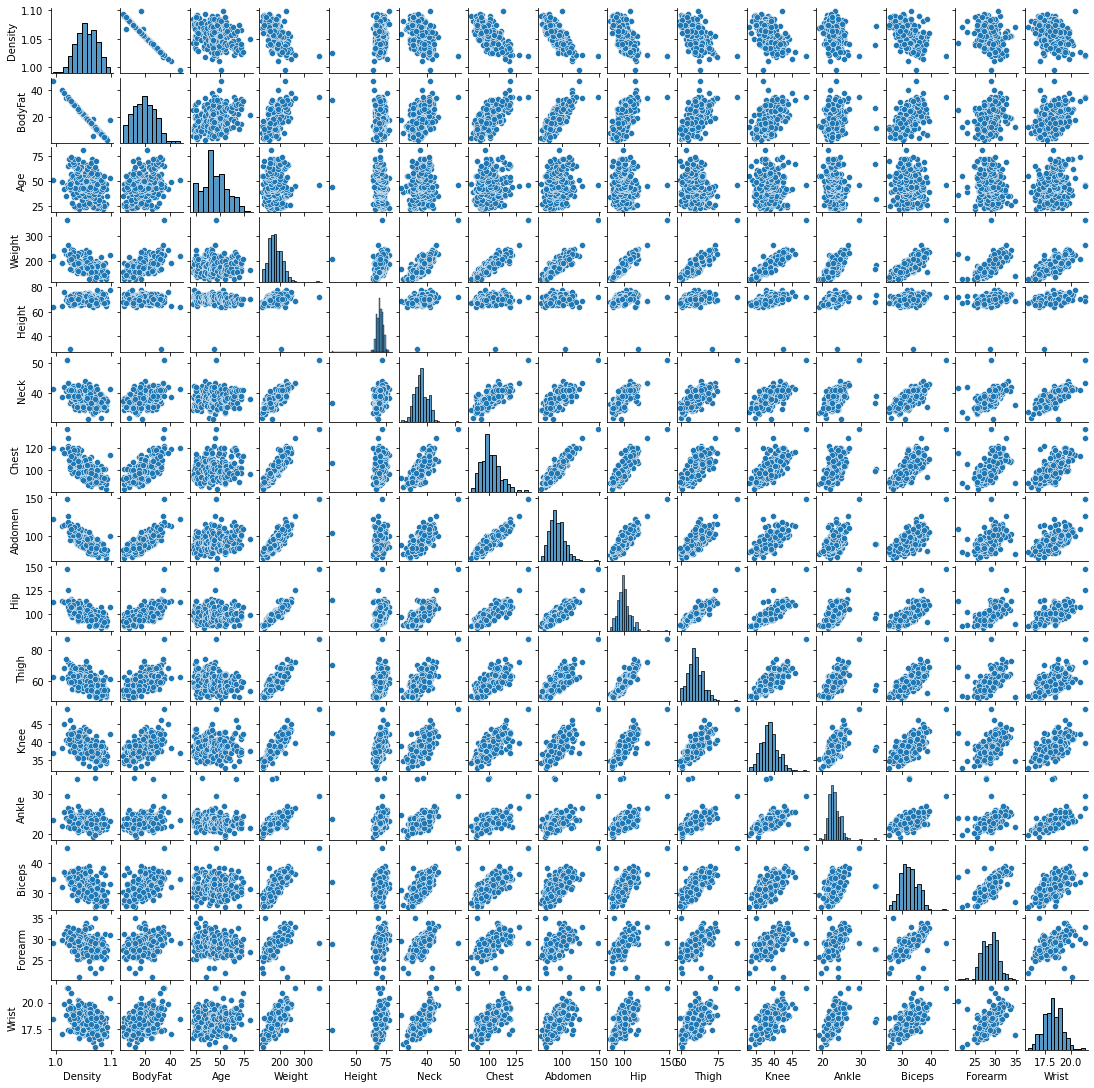

In [12]:
plot = sns.pairplot(data)
plot.fig.set_size_inches(15,15)

plot

<AxesSubplot:>

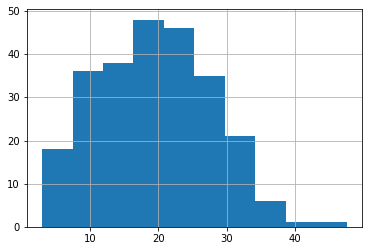

In [13]:
data.BodyFat.hist()

The dependent variable has a normal distribution when plotted and is confirmed using the normal test and since p value is greater than .05 the null hypothesis that it is a normal distribution is accepted

In [14]:
from scipy.stats.mstats import normaltest
normaltest(data.BodyFat.values)

NormaltestResult(statistic=3.446640359699565, pvalue=0.1784726019802904)

BMI metric was added as it is a more accurate measurement of body fat and weight and height were removed.

In [15]:
data['BMI'] = data.apply(lambda row: row.Weight * 0.453592 / (row.Height * 0.0254)**2, axis = 1)


In [16]:
ybf = data['BodyFat']
xbf = data.drop(['BodyFat','Density','Age','Weight','Height'] , axis =1)

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

K fold was used to split the data into 4 parts and cross val predict was used to train using different combinations of 3 parts and test with the last part. A pipeline function was build inorder to combine multiple steps like scaling and regression.

In [18]:
kf = KFold(shuffle =True, random_state= 42, n_splits= 3)

lr = LinearRegression()
s = StandardScaler()

estimator = Pipeline([("scaler",s),("regression",lr)])

In [19]:
predictions = cross_val_predict(estimator,xbf,ybf, cv=kf)
len(predictions)

250

In [20]:
r2_score(ybf , predictions)

0.6067588910877655

GridSearch CV is then used to run multiple iterations of the same model with different hyperparameters, to find the set of hyperparameter that maximises the r2 score.Here we use ridge regression, where a penality is added to the cost function that is the sum of squared coefficients values.

In [21]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),("ridge",Ridge())])
params ={'ridge__alpha':  np.geomspace(0.1,10,20)}
grid = GridSearchCV(estimator, params , cv=kf)

In [22]:
grid.fit(xbf,ybf)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [23]:
grid.best_score_,grid.best_params_

(0.5998752520342935, {'ridge__alpha': 0.1})

In [24]:
ypred = grid.predict(xbf)

In [25]:
r2_score(ybf,ypred)

0.7310715139693209

In [26]:
grid.best_estimator_.named_steps['ridge'].coef_

array([-1.41877648, -0.81441748, 10.86647002, -3.00485496,  0.49476725,
       -0.19932439,  0.01655645,  0.36201339,  0.68900833, -1.35134102,
        0.4542804 ])

In [27]:
a = list(xbf.columns)


In [28]:
coef_table1 = pd.DataFrame(a).copy()
coef_table1.insert(len(coef_table1.columns ) ,"Coefs" ,grid.best_estimator_.named_steps['ridge'].coef_.transpose())
coef_table1.sort_values(by=['Coefs'], ascending=False)

,0,Coefs
2,Abdomen,10.866470
8,Forearm,0.689008
4,Thigh,0.494767
10,BMI,0.454280
7,Biceps,0.362013
6,Ankle,0.016556
5,Knee,-0.199324
1,Chest,-0.814417
9,Wrist,-1.351341
0,Neck,-1.418776


GridSearch CV is then used to run multiple iterations of the same model with different hyperparameters, to find the set of hyperparameter that maximises the r2 score. This model uses polynomial features to create new variables that are products of existing variables with a maximum order of 2 as defined in params and lasso regression adds a penality to the cost function that is equal to the sum of modulus of all coefficients.

In [29]:
estimator = Pipeline([("polyfeat",PolynomialFeatures()),("scaler", StandardScaler()),("lasso",Lasso())])
params ={'polyfeat__degree': [1,2],'lasso__alpha':  np.geomspace(0.1,10,20)}
grid2 = GridSearchCV(estimator, params , cv=kf)

In [30]:
grid2.fit(xbf,ybf)

C:\Users\Alin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0379157706720434, tolerance: 1.000336491017964
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('polyfeat', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'polyfeat__degree': [1, 2]})

The hyperparameters which resulted in the highest r2 scores are outputted.

In [31]:
grid2.best_score_,grid2.best_params_

(0.6653692311364875,
 {'lasso__alpha': 0.12742749857031338, 'polyfeat__degree': 2})

In [32]:
ypred2 = grid2.predict(xbf)

In [33]:
r2_score(ybf,ypred2)

0.7277503565177259

Lasso regression has the ability to reduce the coefficients of newly generated variables to 0 while regularizing thus helping in feature selection.

In [34]:
grid2.best_estimator_.named_steps['lasso'].coef_

array([ 0.        , -0.        , -0.        ,  8.84023814, -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.90598561, -0.        , -0.        , -0.07478717, -0.        ,
        0.        , -0.85195578,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.60385496,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -1.87392858,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.  

The names of the newly created variables are generated using the below code and respective coefficients are inserted next to it.

In [35]:
#getting names
pf = PolynomialFeatures(degree=2)
features= xbf.columns
pf.fit(data[features])
names = pf.get_feature_names(input_features = features)

In [36]:
coef_table2 = pd.DataFrame(names).copy()
coef_table2.insert(len(coef_table2.columns ) ,"Coefs" ,grid2.best_estimator_.named_steps['lasso'].coef_.transpose())
coef_table2.sort_values(by=['Coefs'], ascending=False)

,0,Coefs
3,Abdomen,8.840238
39,Abdomen Forearm,0.603855
74,Forearm BMI,0.318704
49,Hip BMI,0.000000
56,Thigh BMI,0.000000
...,...,...
23,Chest^2,-0.000000
18,Neck Ankle,-0.074787
21,Neck Wrist,-0.851956
15,Neck Hip,-0.905986


Here random forest regressor is used and 50 regression trees are required to get highest r2 value

In [37]:
from sklearn.ensemble import RandomForestRegressor
RR = RandomForestRegressor()

estimator = Pipeline([("scaler", StandardScaler()),("RR",RR)])
params ={'RR__n_estimators':  [10,20,30,40,50,60,70,80,80,100]}
grid3 = GridSearchCV(estimator, params , cv=kf, n_jobs =-1)

In [38]:
grid3.fit(xbf,ybf)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RR', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'RR__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80,
                                              80, 100]})

In [39]:
grid3.best_score_,grid3.best_params_

(0.6211011192398039, {'RR__n_estimators': 100})

In [40]:
ypred3 = grid3.predict(xbf)
r2_score(ybf,ypred3)

0.9531951204720842

In [41]:
grid3.best_estimator_.named_steps['RR'].feature_importances_

array([0.03333245, 0.02857592, 0.70455037, 0.03046027, 0.0230892 ,
       0.03313434, 0.02895671, 0.02148976, 0.02261813, 0.03371111,
       0.04008174])

In [42]:
coef_table3 = pd.DataFrame(a).copy()
coef_table3.insert(len(coef_table3.columns ) ,"Coefs" ,grid3.best_estimator_.named_steps['RR'].feature_importances_.transpose())
coef_table3.sort_values(by=['Coefs'], ascending=False)

,0,Coefs
2,Abdomen,0.704550
10,BMI,0.040082
9,Wrist,0.033711
0,Neck,0.033332
5,Knee,0.033134
3,Hip,0.030460
6,Ankle,0.028957
1,Chest,0.028576
4,Thigh,0.023089
8,Forearm,0.022618


The random forest regressor has yielded a r2 value of .951 and the highest contribution to body fat seems to be abdominal circumference, BMI and hip circumference in this particular model.